In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
from astropy.constants import c
from astropy import constants as const
import astropy.units as u
from scipy import special


def weight(n):
    return 2 * n**2

def boltzmann(n1, n2, eV, T):
    k = 8.6173303e-5  # Boltzmann constant in eV/K
    g_n = weight(n2) / weight(n1) * np.exp(-eV / (k * T))
    return g_n

def CIV(T):
    sigma_Lya = 5.9e-14 * (T / 1e4) ** (-1/2)
    sigma_CIV = (0.19 / 0.4164) * sigma_Lya * (12) ** (0.5)
    N_CIV_0 = 1 / sigma_CIV
    return sigma_Lya, sigma_CIV, N_CIV_0

sig_ly, sig_c, N_CIV_0 = CIV(1e5)
print("{:.2e}".format(N_CIV_0))

def tau(sig_c, x):
    return sig_c * x


directory_1 = '/home/jin/data_CIV/'
rr = np.arange(12, 17, 1, dtype=np.float128)
atom_N = [13,20,32,50,79]
total_N_c = np.outer(10**rr, atom_N) / 10
total_N_c = total_N_c.flatten()

emit = np.arange(100,700,100)
emit = np.append([1,50],emit)

expand_vel = np.arange(0,1100,100)

random_vel= [11.8,30,50,100,150]


C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm

C_IV_K_A = 1548.187 # cm
C_IV_H_A = 1550.772  # cm

cc = c.to(u.cm / u.s).value
v_th = 11.7673179819719e5  # cm/s

K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952


# directory_1 = '/home/jin/data_jin/'

cc_k = c.to(u.km / u.s).value
V_K = 0
V_H = (C_IV_H/C_IV_K -1 ) * cc_k
def function(sigma,lam,lam_k,lam_h):
    tv_k = ((lam-lam_k) / lam_k ) * cc_k
    tv_h = ((lam-lam_h) / lam_h ) * cc_k
    tk = (tv_k)**2 / sigma**2
    th = (tv_h)**2 / sigma**2
    fx = (1 / np.sqrt(2*np.pi*sigma**2))  *(2*np.exp(-tk/2) + np.exp(-th/2) )
    f0 = fx[np.argmax(fx)]
    return fx , f0

# plt.plot(del_V_space_g,yy_g)


def finding_FWHM_K(x, y,v_0):


    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return FWHM*2


def finding_FWHM_H(x, y,v_0):

    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return  FWHM*2

sigma_Lya, sigma_CIV, N_CIV_0 = CIV(1e5)
tau_0 = tau(sigma_CIV,total_N_c)

3.39e+13


In [2]:
expand_vel

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])

In [3]:
check = 0
random_vel= [11.8]
for ii, index in enumerate(rr):
    index = int(index)
    for jj, atom in enumerate(atom_N):
        atom = int(atom)
        for kk, v_rand in enumerate(random_vel):
            if v_rand == 11.8:
                v_rand = int(v_rand * 10)
                v_title = int(v_rand)
                v_rand_index = 1
            elif v_rand < 100 and v_rand > 15:
                v_title = int(v_rand * 10)
                v_rand_index = 1
            else:
                v_title = int(v_rand)
                v_rand_index = 2
            for oo,expand_v in enumerate(expand_vel):
                if expand_v == 0:
                    expand_title = '000'
                    expand_index = 0
                elif expand_v >= 1000:
                    expand_title = int(expand_v/10)
                    expand_index= 3
                else :
                    expand_title = expand_v
                    expand_index = 2
                for mm, emit_v in enumerate(emit):
                    if emit_v == 1 :
                        emit_title = 100
                        emit_index = 0
                    elif emit_v >= 1000:
                        emit_title = int(emit_v/10)
                        emit_index = 3 
                    elif emit_v < 100  and emit_v > 1:
                            emit_title = int(emit_v * 10)
                            emit_index = 1
                    else :
                        emit_title = emit_v
                        emit_index = 2

                    path_sp = f'{directory_1}N_atom{atom}0E+{index}_Vexp{expand_title}E+0{expand_index}_Vemit{emit_title}E+0{emit_index}_tauD000E+00_Vran{v_title}E+0{v_rand_index}spec_com.dat'
                    
                    try:
                        data_sp = pd.read_csv(path_sp, sep='\s+', header=None)
                    except FileNotFoundError:
                        print(f"파일을 찾을 수 없습니다: {path_sp}")
                        check += 1
                        continue
                    
                    # 데이터 처리 코드 실행
                    globals()[f'data_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = data_sp
                    globals()[f'tot_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = data_sp[0]
                    globals()[f'tot_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = data_sp[1]

                    # K and H line separate
                    lam_c = (C_IV_K_A + C_IV_H_A) / 2
                    # lam_c = 300
                    # K line
                    globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'tot_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= lam_c]
                    globals()[f'tot_flux_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'tot_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= lam_c]
                    # H line
                    globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'tot_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= lam_c]
                    globals()[f'tot_flux_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'tot_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= lam_c]



                    # K line double peak separate
                    if v_rand == 118:
                        Fraction =0.000014 #0.000018
                    else:
                        Fraction =0.000018  #0.000018
                    C_IV_K_P = C_IV_K_A +  C_IV_K_A*Fraction 
                    C_IV_K_N = C_IV_K_A  -  C_IV_K_A*Fraction 

                    X_K_P = globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_K_P ].to_numpy()
                    X_K_N = globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_K_N].to_numpy()
                    filtered_series_K_pos_1 = globals()[f'tot_flux_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_K_P ].to_numpy()
                    filtered_series_K_neg_1 = globals()[f'tot_flux_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_K_N].to_numpy()

                    tt_K = (globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_K_N) | (globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_K_P )

                    globals()[f'tot_x_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = np.compress(tt_K, globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'])
                    globals()[f'tot_y_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = np.compress(tt_K, globals()[f'tot_flux_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'])

                        # H line double peak separate
                    C_IV_H_P = C_IV_H_A +  C_IV_H_A*Fraction 
                    C_IV_H_N = C_IV_H_A -  C_IV_H_A*Fraction 

                    X_H_P = globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_H_P].to_numpy()
                    X_H_N = globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_H_N].to_numpy()
                    filtered_series_H_pos_1 = globals()[f'tot_flux_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_H_P].to_numpy()
                    filtered_series_H_neg_1 = globals()[f'tot_flux_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_H_N].to_numpy()

                    tt_H = (globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_H_N) | (globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_H_P)

                    

                    globals()[f'tot_x_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = np.compress(tt_H, globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'])
                    globals()[f'tot_y_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = np.compress(tt_H, globals()[f'tot_flux_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'])

                    globals()[f'tot_vx_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = ((globals()[f'tot_x_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] - C_IV_K_A) / C_IV_K_A) * cc_k
                    globals()[f'tot_vy_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'tot_y_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']

                    globals()[f'tot_vx_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = ((globals()[f'tot_x_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] - C_IV_K_A) / C_IV_K_A) * cc_k
                    globals()[f'tot_vy_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'tot_y_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']

print(check)


0


In [4]:
check = 0

for ii, index in enumerate(rr):
    index = int(index)
    for jj, atom in enumerate(atom_N):
        atom = int(atom)
        for kk, v_rand in enumerate(random_vel):
            if v_rand == 11.8:
                v_rand = int(v_rand * 10)
                v_title = int(v_rand)
                v_rand_index = 1
            elif v_rand < 100 and v_rand > 15:
                v_title = int(v_rand * 10)
                v_rand_index = 1
            else:
                v_title = int(v_rand)
                v_rand_index = 2
            for oo,expand_v in enumerate(expand_vel):
                if expand_v == 0:
                    expand_title = '000'
                    expand_index = 0
                elif expand_v >= 1000:
                    expand_title = int(expand_v/10)
                    expand_index= 3
                else :
                    expand_title = expand_v
                    expand_index = 2
                for mm, emit_v in enumerate(emit):
                    if emit_v == 1 :
                        emit_title = 100
                        emit_index = 0
                    elif emit_v >= 1000:
                        emit_title = int(emit_v/10)
                        emit_index = 3 
                    elif emit_v < 100  and emit_v > 1:
                        emit_title = int(emit_v * 10)
                        emit_index = 1
                    else :
                        emit_title = emit_v
                        emit_index = 2

                    path_sp = f'{directory_1}N_atom{atom}0E+{index}_Vexp{expand_title}E+0{expand_index}_Vemit{emit_title}E+0{emit_index}_tauD000E+00_Vran{v_title}E+0{v_rand_index}spec_com.dat'

                
                    try:
                        data_sp = pd.read_csv(path_sp, sep='\s+', header=None)
                    except FileNotFoundError:
                        print(f"파일을 찾을 수 없습니다: {path_sp}")
                        check += 1
                        continue
                    
                    # 데이터 처리 코드 실행
                    globals()[f'data_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = data_sp
                    globals()[f'halo_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = data_sp[0]
                    globals()[f'halo_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = data_sp[2]

                    # K and H line separate
                    lam_c = (C_IV_K_A + C_IV_H_A) / 2
                    # lam_c = 300
                    # K line
                    globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'halo_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= lam_c]
                    globals()[f'halo_flux_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'halo_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= lam_c]
                    # H line
                    globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'halo_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= lam_c]
                    globals()[f'halo_flux_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'halo_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= lam_c]



                    # K line double peak separate
                    Fraction =0.0000
                    C_IV_K_P = C_IV_K_A +  C_IV_K_A*Fraction 
                    C_IV_K_N = C_IV_K_A  -  C_IV_K_A*Fraction 

                    X_K_P = globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_K_P ].to_numpy()
                    X_K_N = globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_K_N].to_numpy()
                    filtered_series_K_pos_1 = globals()[f'halo_flux_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_K_P ].to_numpy()
                    filtered_series_K_neg_1 = globals()[f'halo_flux_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_K_N].to_numpy()

                    tt_K = (globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_K_N) | (globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_K_P )

                    globals()[f'halo_x_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = np.compress(tt_K, globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'])
                    globals()[f'halo_y_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = np.compress(tt_K, globals()[f'halo_flux_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'])

                        # H line double peak separate
                    C_IV_H_P = C_IV_H_A +  C_IV_H_A*Fraction 
                    C_IV_H_N = C_IV_H_A -  C_IV_H_A*Fraction 

                    X_H_P = globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_H_P].to_numpy()
                    X_H_N = globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_H_N].to_numpy()
                    filtered_series_H_pos_1 = globals()[f'halo_flux_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_H_P].to_numpy()
                    filtered_series_H_neg_1 = globals()[f'halo_flux_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_H_N].to_numpy()

                    tt_H = (globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_H_N) | (globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_H_P)

                    

                    globals()[f'halo_x_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = np.compress(tt_H, globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'])
                    globals()[f'halo_y_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = np.compress(tt_H, globals()[f'halo_flux_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'])

                    globals()[f'halo_vx_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = ((globals()[f'halo_x_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] - C_IV_K_A) / C_IV_K_A) * cc_k
                    globals()[f'halo_vy_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'halo_y_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']

                    globals()[f'halo_vx_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = ((globals()[f'halo_x_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] - C_IV_K_A) / C_IV_K_A) * cc_k
                    globals()[f'halo_vy_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'halo_y_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']

print(check)


0


In [5]:
def x_finding_FWHM_K(x, y,v_0):


    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return min(x_f_1) , max(x_f_1)


def x_finding_FWHM_H(x, y,v_0):

    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return  min(x_f_1) , max(x_f_1)


1.0028984917982813


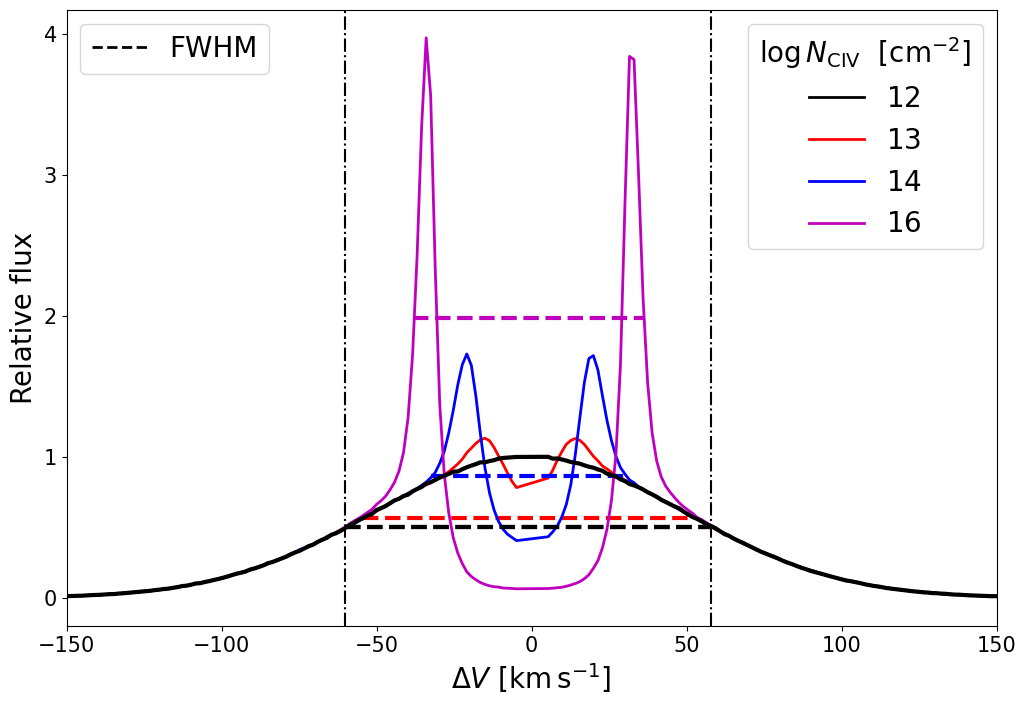

In [6]:
fig = plt.figure(1,figsize=(12,8))

expand =0 
emit = 50


vel_k = 118

# plt.axvline(x=45,ymin=0,ymax=5)
atom_n = 13
index = 12
color = 'k'
normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,color = color,lw=2,label=f'${index}$')
x_min, x_max = x_finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'], 0)
plt.hlines(y=globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal_f/2,xmin=x_min,xmax=x_max,linestyle='--',color = color,lw=3)

plt.axvline(x=x_min,ymin=0,ymax=10,linestyle='dashdot',color='k')
plt.axvline(x=x_max,ymin=0,ymax=10,linestyle='dashdot',color='k')
print( (x_max-x_min)/ (emit*2*np.sqrt(2*np.log(2))))
atom_n = 79
index = 13
color = 'r'
# normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,color = color,lw=2,label=f'$ {index}$')
# plt.axhline(y =globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal_f/2 , xmin=0,xmax=1 )
x_min, x_max = x_finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'], 0)
plt.hlines(y=globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal_f/2,xmin=x_min,xmax=x_max,linestyle='--',color = color,lw=3)

atom_n = 50
index = 14
color = 'b'
# normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,color = color,lw=2,label=f'${index}$')
# plt.axhline(y =globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal_f/2 , xmin=0,xmax=1 )
x_min, x_max = x_finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'], 0)
plt.hlines(y=globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal_f/2,xmin=x_min,xmax=x_max,linestyle='--',color = color,lw=3)
# index = 15
# # normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
# plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,'m')

atom_n = 79
index = 16
color = 'm'
# normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,color = color,lw=2,label=f'$ {index}$')
# plt.axhline(y =globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal_f/2 , xmin=0,xmax=1 )
x_min, x_max = x_finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'], 0)
plt.hlines(y=globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal_f/2,xmin=x_min,xmax=x_max,linestyle='--',color = color,lw=3)

atom_n = 13
index = 12
color = 'k'
normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,color = color,lw=3)
x_min, x_max = x_finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'], 0)
plt.hlines(y=globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal_f/2,xmin=x_min,xmax=x_max,linestyle='--',color = color,lw=3)

plt.xlim(-150,150)




plt.legend(ncol=2,fontsize=20,title=r'$\log N_{\rm CIV}~~[\rm cm^{-2}]$',title_fontsize=20)
plt.xlabel(r'$\Delta V ~ [\rm km\,s^{-1}]$',fontsize=20)
plt.ylabel('Relative flux',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks([0.0,1.0,2.0,3.0,4.0],fontsize=15)
# plt.xtick


handles, labels = plt.gca().get_legend_handles_labels()
ff_t = plt.legend(handles[::], labels[::], ncol=1,fontsize=20,loc='upper right',title=r'$\log N_{\rm CIV}~~[\rm cm^{-2}]$',title_fontsize=20)

# Add the first legend back to the plot
plt.gca().add_artist(ff_t )
import matplotlib.lines as mlines
outflow_line = mlines.Line2D([], [], color='black', linestyle='--',lw=2,label='FWHM')


# # Add a second legend
second_legend = plt.legend(handles=[outflow_line], loc='upper left', fontsize=20)
# plt.savefig(r'/home/jin/바탕화면/column_density_FWHM_low_and_high_emit_50.pdf',bbox_inches='tight')

In [7]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
from astropy.constants import c
from astropy import constants as const
import astropy.units as u
from scipy import special


def weight(n):
    return 2 * n**2

def boltzmann(n1, n2, eV, T):
    k = 8.6173303e-5  # Boltzmann constant in eV/K
    g_n = weight(n2) / weight(n1) * np.exp(-eV / (k * T))
    return g_n

def CIV(T):
    sigma_Lya = 5.9e-14 * (T / 1e4) ** (-1/2)
    sigma_CIV = (0.19 / 0.4164) * sigma_Lya * (12) ** (0.5)
    N_CIV_0 = 1 / sigma_CIV
    return sigma_Lya, sigma_CIV, N_CIV_0

sig_ly, sig_c, N_CIV_0 = CIV(1e5)
print("{:.2e}".format(N_CIV_0))

def tau(sig_c, x):
    return sig_c * x


directory_1 = '/home/jin/data_CIV/'
rr = np.arange(12, 17, 1, dtype=np.float128)
atom_N = [13,20,32,50,79]
total_N_c = np.outer(10**rr, atom_N) / 10
total_N_c = total_N_c.flatten()

emit = np.arange(100,700,100)
emit = np.append([1,50],emit)

expand_vel = np.arange(0,1100,100)

random_vel= [11.8,30,50,100,150]


C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm

C_IV_K_A = 1548.187 # cm
C_IV_H_A = 1550.772  # cm

cc = c.to(u.cm / u.s).value
v_th = 11.7673179819719e5  # cm/s

K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952


# directory_1 = '/home/jin/data_jin/'

cc_k = c.to(u.km / u.s).value
V_K = 0
V_H = (C_IV_H/C_IV_K -1 ) * cc_k
def function(sigma,lam,lam_k,lam_h):
    tv_k = ((lam-lam_k) / lam_k ) * cc_k
    tv_h = ((lam-lam_h) / lam_h ) * cc_k
    tk = (tv_k)**2 / sigma**2
    th = (tv_h)**2 / sigma**2
    fx = (1 / np.sqrt(2*np.pi*sigma**2))  *(2*np.exp(-tk/2) + np.exp(-th/2) )
    f0 = fx[np.argmax(fx)]
    return fx , f0

# plt.plot(del_V_space_g,yy_g)


def finding_FWHM_K(x, y,v_0):


    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return FWHM*2


def finding_FWHM_H(x, y,v_0):

    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return FWHM*2

sigma_Lya, sigma_CIV, N_CIV_0 = CIV(1e5)
tau_0 = tau(sigma_CIV,total_N_c)

3.39e+13


In [8]:
def finding_FWHM_K(x, y,v_0):


    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return x_f_1, FWHM*2

[np.float64(-38.360279429908736), np.float64(-31.079378336717017), np.float64(28.697594202526176), np.float64(35.978495295761924)] 76.72055885981747
[np.float64(-33.98399313451718), np.float64(-25.250784642425376), np.float64(22.869000508234535), np.float64(31.602209000370358)] 67.96798626903436
[np.float64(-33.98399313451718), np.float64(-17.950519450542323), np.float64(14.116427917451404), np.float64(30.149901601426254)] 67.96798626903436


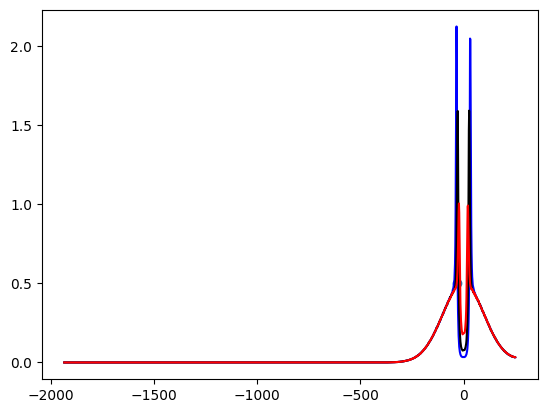

In [9]:
atom_n , index , expand = 79,15,0 
emit = 100
vel_k = 118
index = 16
# normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,'b')
aa ,bb = finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
print(aa,bb)

index = 15
# normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,'k')
aa ,bb = finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
print(aa,bb)


index = 14
# normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,'r')
aa ,bb = finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
print(aa,bb)
plt.scatter(aa[0],globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal_f/2)

([<matplotlib.axis.YTick at 0x71fcc36e6020>,
 [Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$')])

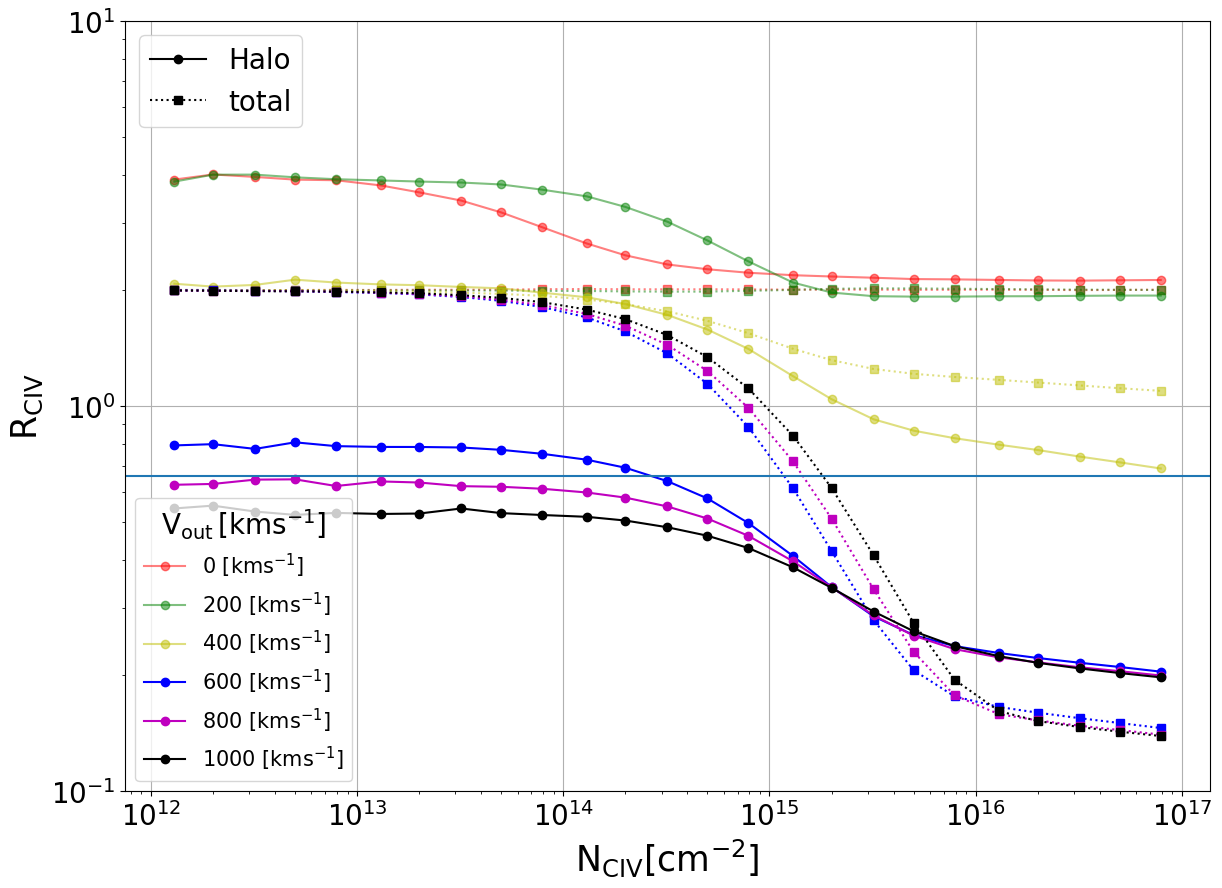

In [10]:

import math
rr = np.arange(12, 17, 1, dtype=np.float128)
atom_N = [13,20,32,50,79]
total_N_c = np.outer(10**rr, atom_N) / 10
total_N_c = total_N_c.flatten()

lam_c = (C_IV_H_A+ C_IV_K_A) / 2
def inf_K(x,y):
    xx = np.where(x >=(C_IV_K_A - lam_c))[0]
    x = x[xx]
    y = y[xx] 
    dx = x[1]- x[0]
    summ = np.sum(dx*y,axis=0)
    return summ
def inf_H(x,y):
    xx = np.where(x <=(C_IV_H_A + lam_c))[0]
    x = x[xx]
    y = y[xx] 
    dx = x[1]- x[0]
    summ = np.sum(dx*y,axis=0)
    return summ

vel_k= 118
emit = 100
ratio_h = np.zeros((len(expand_vel),len(total_N_c)))
ratio_t = np.zeros((len(expand_vel),len(total_N_c)))

for ii,expand in enumerate(expand_vel):
    for jj, N_civ in enumerate(total_N_c):
            index = math.floor(math.log10(N_civ))
            atom_n = int(N_civ/ 10**index * 10)

            a_1 = inf_K(globals()[f'halo_x_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_y_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'])
            a_2 = inf_H(globals()[f'halo_x_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_y_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'])
            ratio_h[ii][jj] = a_1/ a_2

            a_3 = inf_K(globals()[f'tot_x_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'tot_y_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'])
            a_4 = inf_H(globals()[f'tot_x_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'tot_y_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'])
            ratio_t[ii][jj] = a_3/ a_4


fig = plt.figure(1,figsize=(14,10))

# from matplotlib.ticker import ScalarFormatter
# # for ii, jj in enumerate(ee):


expand = 0
plt.plot(total_N_c, ratio_h[expand][:], 'ro-',alpha=0.5,label=f'{expand} $[\\rm km s^{{-1}}]$')
plt.plot(total_N_c, ratio_t[expand][:], 'r:', marker='s', alpha=0.5)


expand = 2
plt.plot(total_N_c, ratio_h[expand][:], 'go-',alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
plt.plot(total_N_c, ratio_t[expand][:], 'g:', marker='s', alpha=0.5)


expand = 4
plt.plot(total_N_c, ratio_h[expand][:], 'yo-',alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
plt.plot(total_N_c, ratio_t[expand][:], 'y:', marker='s', alpha=0.5)

expand = 6
plt.plot(total_N_c, ratio_h[expand][:], 'bo-',alpha=1,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
plt.plot(total_N_c, ratio_t[expand][:], 'b:', marker='s', alpha=1)

expand = 8
plt.plot(total_N_c, ratio_h[expand][:], 'mo-',alpha=1,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
plt.plot(total_N_c, ratio_t[expand][:], 'm:', marker='s', alpha=1)

expand = 10
plt.plot(total_N_c, ratio_h[expand][:], 'ko-',alpha=1,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
plt.plot(total_N_c, ratio_t[expand][:], 'k:', marker='s', alpha=1)

handles, labels = plt.gca().get_legend_handles_labels()
ff_t = plt.legend(handles[::], labels[::], title='$\mathrm{V}_\mathrm{out}\,[\mathrm{km s^{-1}}]$', title_fontsize=20, fontsize=15)



# Add the first legend back to the plot
plt.gca().add_artist(ff_t )

import matplotlib.lines as mlines
outflow_line = mlines.Line2D([], [], color='black', marker='o', label='Halo')
inflow_line = mlines.Line2D([], [], color='black', linestyle=':',marker='s', label='total')

# # Add a second legend
second_legend = plt.legend(handles=[outflow_line, inflow_line], loc='upper left', fontsize=20)



plt.xscale('log')
plt.xlabel(r'${\rm N}_{\rm C IV} [\rm cm^{-2}]$',fontsize=25)
plt.ylabel(r'${\rm R}_{\rm C IV} $',fontsize=25)
plt.xticks(fontsize=20)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# plt.legend('-')

plt.axhline(y=0.66,xmin=0,xmax=1)
plt.grid(True)
plt.yscale('log')
plt.yticks([0.1, 1, 10], fontsize=20)

# plt.savefig('/home/jin/바탕화면/DelV_gauss_source_ratio_halo.pdf',bbox_inches='tight')

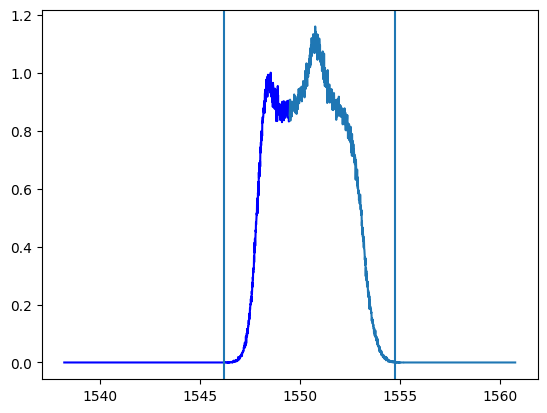

In [11]:
atom_n = 50
index = 14

vel_k = 118


emit = 100

# expand = 0
# normal_f = globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
# plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,'r')
# plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f )



# expand = 200
# normal_f = globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
# plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f,'g' )
# plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f )

# # expand = 300
# # plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f )
# # plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f )

expand = 1000
normal_f = globals()[f'halo_y_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
plt.plot(globals()[f'halo_x_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_y_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,'b')
plt.plot(globals()[f'halo_x_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_y_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f )

# expand = 400
# normal_f = globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
# plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,'k')
# # plt.plot(



# plt.xlim(-750,1500)
plt.axvline(x=C_IV_K_A-2,ymin=0,ymax=8e5)
plt.axvline(x=C_IV_H_A+4,ymin=0,ymax=8e5)
# plt.axvline(x=-200,ymin=0,ymax=8e5)
# plt.axvline(x=-300,ymin=0,ymax=8e5)



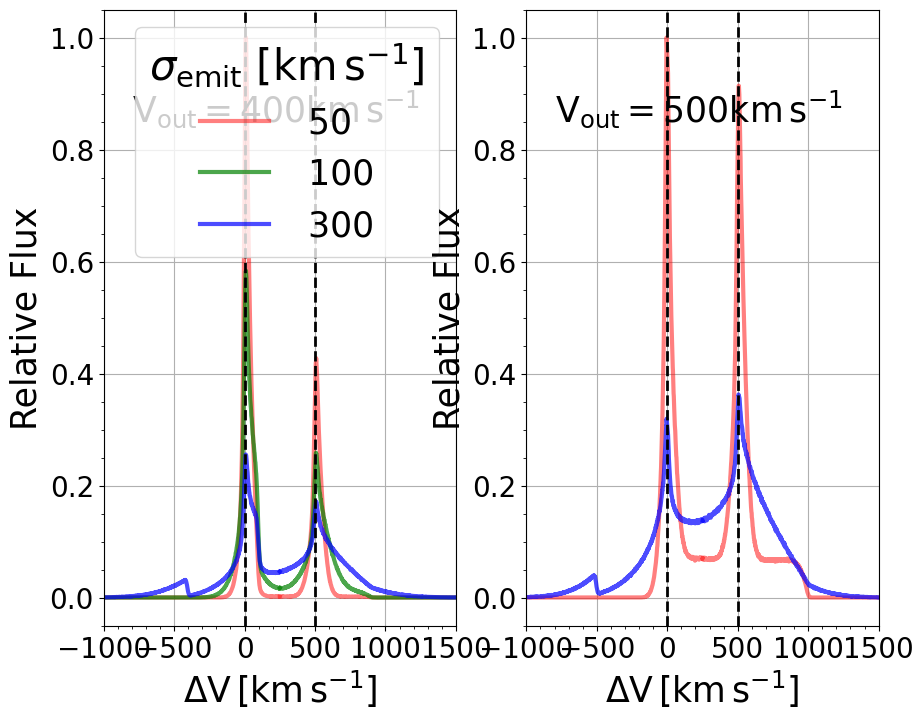

In [12]:
fig = plt.figure(1,figsize=(10,8))
atom_n , index , expand = 13,15,0 

vel_k = 118
plt.subplot(121)
emit = 50
expand = 400
normal_f =  max(max(globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']), max(globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']))
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/ normal_f ,'r-',lw=3,alpha=0.5, label = f' {emit}')
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/ normal_f ,'r-',lw=3,alpha=0.5)
emit = 100
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/ normal_f ,'g-',lw=3,alpha=0.7, label = f' {emit}')
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/ normal_f ,'g-',lw=3,alpha=0.7)

emit = 300
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] / normal_f ,'b-',lw=3,alpha=0.7, label = f' {emit}')
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] / normal_f ,'b-',lw=3,alpha=0.7)

plt.text(-800,0.85,r'$\rm V_{\rm out} = 400 \rm km\,s^{-1}$',fontsize=25)
plt.xlim(-1000, 1500)
plt.minorticks_on()
plt.grid(True)
plt.xlabel(r'$\Delta \rm V \, [\rm km\,s^{-1}]$',fontsize=25)
plt.ylabel(r'Relative Flux',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title = r'$\sigma_{\rm emit}~[\rm km\,s^{-1}]$',title_fontsize=30,fontsize=25)
plt.axvline(x=0,ymin=0,ymax=5,color='k',linestyle='--',lw = 2)
plt.axvline(x=500,ymin=0,ymax=5,color='k',linestyle='--',lw = 2)

plt.subplot(122)
emit = 50
expand = 500
normal_f =  max(max(globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']), max(globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']))
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/ normal_f ,'r-',lw=3,alpha=0.5, label = f' {emit}')
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/ normal_f ,'r-',lw=3,alpha=0.5)
# emit = 100
# plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/ normal_f ,'g-',lw=3,alpha=0.7, label = f' {emit}')
# plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/ normal_f ,'g-',lw=3,alpha=0.7)

emit = 300
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] / normal_f ,'b-',lw=3,alpha=0.7, label = f' {emit}')
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] / normal_f ,'b-',lw=3,alpha=0.7)

plt.text(-800,0.85,r'$\rm V_{\rm out} = 500 \rm km\,s^{-1}$',fontsize=25)
plt.xlim(-1000, 1500)
plt.minorticks_on()
plt.grid(True)
plt.xlabel(r'$\Delta \rm V \, [\rm km\,s^{-1}]$',fontsize=25)
plt.ylabel(r'Relative Flux',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.legend(title = r'$\sigma_{\rm emit}~[\rm km\,s^{-1}]$',title_fontsize=30,fontsize=25)
plt.axvline(x=0,ymin=0,ymax=5,color='k',linestyle='--',lw = 2)
plt.axvline(x=500,ymin=0,ymax=5,color='k',linestyle='--',lw = 2)
# plt.savefig(f'/home/jin/바탕화면/Gmit_50_300_N_index_15_vout_300_600.pdf',bbox_inches='tight')

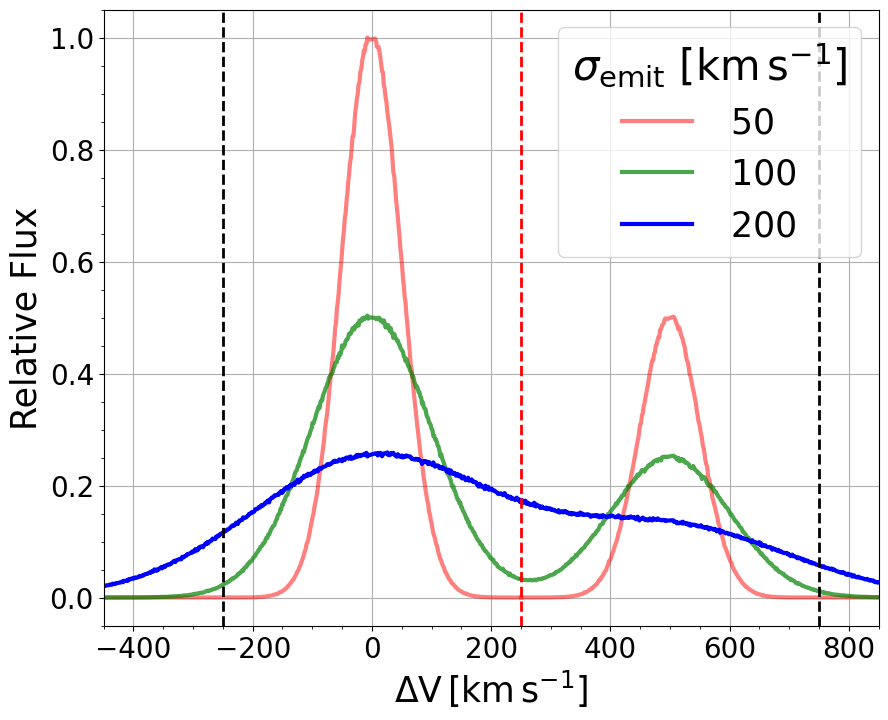

In [17]:
fig = plt.figure(1,figsize=(10,8))
atom_n , index , expand = 50,12,0 

vel_k = 118
emit = 50
expand = 0
normal_f =  max(max(globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']), max(globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']))
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/ normal_f ,'r-',lw=3,alpha=0.5, label = f' {emit}')
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/ normal_f ,'r-',lw=3,alpha=0.5)
emit = 100
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/ normal_f ,'g-',lw=3,alpha=0.7, label = f' {emit}')
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/ normal_f ,'g-',lw=3,alpha=0.7)

emit = 200
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] / normal_f ,'b-',lw=3,alpha=1, label = f' {emit}')
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] / normal_f ,'b-',lw=3,alpha=1)

# plt.text(-800,0.85,r'$\rm V_{\rm out} = 300 \rm km\,s^{-1}$',fontsize=25)
plt.xlim(-450, 850)
plt.minorticks_on()
plt.grid(True)
plt.xlabel(r'$\Delta \rm V \, [\rm km\,s^{-1}]$',fontsize=25)
plt.ylabel(r'Relative Flux',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title = r'$\sigma_{\rm emit}~[\rm km\,s^{-1}]$',title_fontsize=30,fontsize=25)
# plt.axvline(x=0,ymin=0,ymax=5,color='k',linestyle='--',lw = 2)
plt.axvline(x=250,ymin=0,ymax=5,color='r',linestyle='--',lw = 2)
plt.axvline(x=-250,ymin=0,ymax=5,color='k',linestyle='--',lw = 2)
plt.axvline(x=750,ymin=0,ymax=5,color='k',linestyle='--',lw = 2)
# plt.text(-230,0.8,'K line',size=30)
# plt.text(280,0.5,'H line',size=30)

# plt.axvline(x=500,ymin=0,ymax=5,color='k',linestyle='--',lw = 2)
# Gmit_50_300_N_index_15_vout_0.pdf
plt.savefig(f'/home/jin/바탕화면/Gmit_50_300_N_index_12_vout_0.pdf',bbox_inches='tight')


-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964
-1934.9575578175964


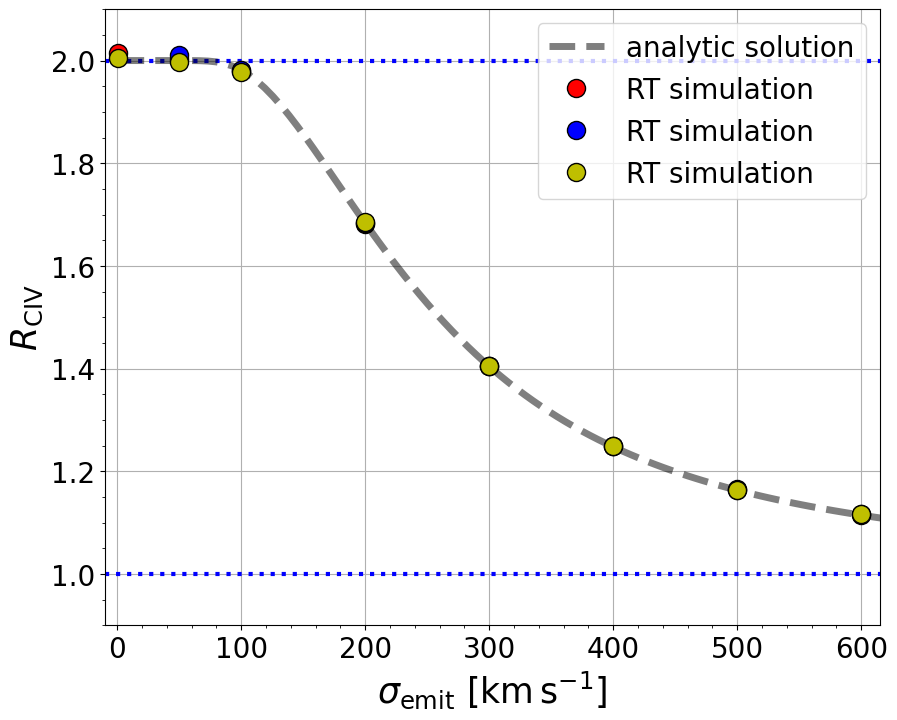

In [14]:
fig = plt.figure(1,figsize=(10,8))
vel_k = 118
atom_n , index , expand = 50,15,0 

expand = 0
emit = np.arange(100,700,100)
emit = np.append([1,50],emit)

def doublet_ratio(vemit):
    ratio = np.zeros(len(vemit))
    for ii, ee in enumerate(vemit): 
        xx_k= np.where((globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{ee}'] >= -250) & (globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{ee}'] <= 250))  
        yy_k = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{ee}'][xx_k]

        xx_h= np.where((globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{ee}'] >= 250) & (globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{ee}'] <= 750))  
        yy_h = globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{ee}'][xx_h]        
        print((globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{ee}']).min())

        ratio[ii] = np.sum(yy_k,0) / np.sum(yy_h,0)

    return ratio

analy_emit = np.linspace(1,650,100)

def analy_doublet_ratio(vemit):
    aa = 250/np.sqrt(2)/vemit
    bb = 750/np.sqrt(2)/vemit
    kk = 3*special.erf(aa) +special.erf(bb)
    hh = 2*special.erf(bb)
    ratio = kk/ hh
    return ratio 

tt =  doublet_ratio(emit)
yy = analy_doublet_ratio(analy_emit)
# tt
plt.axhline(y=2, xmin=0,xmax=1,linestyle=':',color='b',lw=3)
plt.axhline(y=1, xmin=0,xmax=1,linestyle=':',color='b',lw=3)
plt.plot(analy_emit,yy,'k--',lw=5,alpha=0.5,label='analytic solution')
plt.plot(emit, tt,'o',mec='k',mfc='r',ms=13,label='RT simulation')


atom_n , index , expand = 50,13,0 

expand = 0
emit = np.arange(100,700,100)
emit = np.append([1,50],emit)

def doublet_ratio(vemit):
    ratio = np.zeros(len(vemit))
    for ii, ee in enumerate(vemit): 
        xx_k= np.where((globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{ee}'] >= -250) & (globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{ee}'] <= 250))  
        yy_k = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{ee}'][xx_k]

        xx_h= np.where((globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{ee}'] >= 250) & (globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{ee}'] <= 750))  
        yy_h = globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{ee}'][xx_h]        
        print((globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{ee}']).min())

        ratio[ii] = np.sum(yy_k,0) / np.sum(yy_h,0)

    return ratio


tt =  doublet_ratio(emit)

plt.plot(emit, tt,'o',mec='k',mfc='b',ms=13,label='RT simulation')



atom_n , index , expand = 50,16,0 

expand = 0
emit = np.arange(100,700,100)
emit = np.append([1,50],emit)

def doublet_ratio(vemit):
    ratio = np.zeros(len(vemit))
    for ii, ee in enumerate(vemit): 
        xx_k= np.where((globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{ee}'] >= -250) & (globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{ee}'] <= 250))  
        yy_k = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{ee}'][xx_k]

        xx_h= np.where((globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{ee}'] >= 250) & (globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{ee}'] <= 750))  
        yy_h = globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{ee}'][xx_h]        
        print((globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{ee}']).min())

        ratio[ii] = np.sum(yy_k,0) / np.sum(yy_h,0)

    return ratio


tt =  doublet_ratio(emit)

plt.plot(emit, tt,'o',mec='k',mfc='y',ms=13,label='RT simulation')


plt.legend(fontsize=20)
plt.xlabel('$\sigma_{\\rm emit} ~ [\\rm km \, s^{-1}]$',fontsize=25)
plt.ylabel('$R_{\\rm CIV}$',fontsize=25)
plt.xlim(-10,615)
plt.ylim(0.9,2.1)
plt.xticks(fontsize=20)
plt.yticks([1.0,1.2,1.4,1.6,1.8,2.0],fontsize=20)
plt.minorticks_on()
plt.grid(True)
# plt.savefig(f'/home/jin/바탕화면/Gmit_50_300_N_index_15_vout_0_Doublet_ratio.pdf',bbox_inches='tight')

In [15]:
xx = np.where((globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{ee}'] >= -250) and (globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{ee}'] <= 250))  
yy = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{ee}']

NameError: name 'ee' is not defined

Gaussian intrinsic velocity가 주어 질때  tau < 1 보다 작다면, scattering 에 의한 효과가 낮기 때문에 gaussian instrinsic 효과 (center source) 가 압도적.
 
Random motion의 3 sigma 보다 intrisic 한 값이 더 크다면, tau > 1 가 되면 점점 중심부로 directly escape 하는 양이 줄어들고 점점 산란에 대한
효과가 커진다. 그리고,  double peak의 peak 값이 intense 하지 않아서, FWHM이 gaussian profile에 속하기 때문에 tau가 증가할 수록 FWHM 이 감소하는 것을 보임. 

그러다가 double peak의 flux가 충분히 강해지고 HM flux가 gaussian profile 상을 벗어난다면, 다시 증가하는 모습을 보임.

만약 Random motion의 3 sigma 보다 intrisic 한 값이 더 작다면, tau > 1 보다 커질 때, FWMH이 초기에 gaussian profile을 벗어난 위치기 때문에 
(3  $\sigma_R$ > $\sigma_{emit}$ ) FWHM이 감소하는 부분이 현저히 적다. 